In [27]:
import pandas as pd
import re

In [150]:
rent_csv_file = './data/cleaned_data.csv' 
rent_data_cleaned= pd.read_csv(rent_csv_file)

Correlations with 'size':
size         1.000000
weight_kg    0.730999
BMI          0.617166
height_cm    0.246745
user_id     -0.002344
rating      -0.024448
item_id     -0.027793
Name: size, dtype: float64


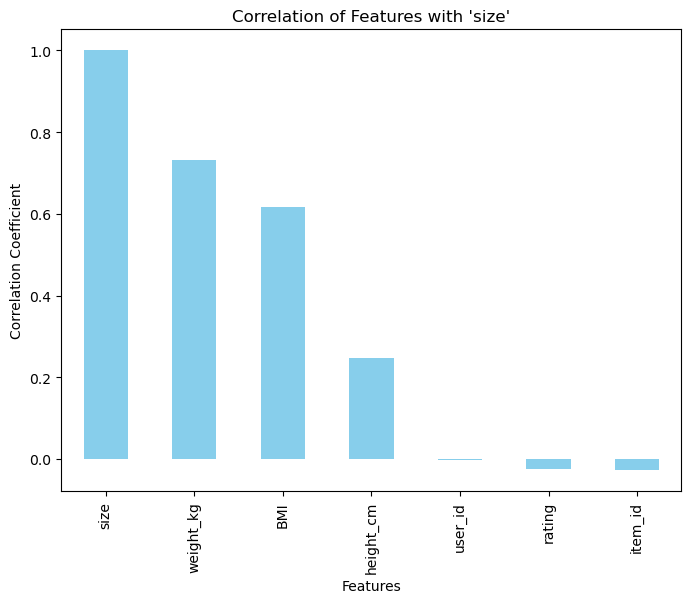

In [152]:
# Select only numeric columns
numeric_data = rent_data_cleaned.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Get correlations of all features with `size`
size_correlation = correlation_matrix['size'].sort_values(ascending=False)

# Display the correlations
print("Correlations with 'size':")
print(size_correlation)

# Visualize the correlations
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
size_correlation.plot(kind='bar', color='skyblue')
plt.title("Correlation of Features with 'size'")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.show()


In [147]:
df = rent_data_cleaned
avg_size_by_body_type = df.groupby('body type')['size'].mean().reset_index()
avg_size_by_body_type.columns = ['body type', 'average_size']

review_count_by_item = df.groupby('item_id').size().reset_index(name='review_count')


item_body_mapping = df[['item_id', 'body type']].drop_duplicates()

pd.DataFrame(avg_size_by_body_type)

,body type,average_size
0,apple,21.279680
1,athletic,10.632858
2,full bust,17.858657
3,hourglass,14.402175
4,pear,14.042738
5,petite,5.528309
6,straight & narrow,7.315357


### Logistic Regression

In [153]:
# Impute missing values in 'height_cm' and 'weight_kg' with their column means
rent_data_cleaned['height_cm'].fillna(rent_data_cleaned['height_cm'].mean(), inplace=True)
rent_data_cleaned['weight_kg'].fillna(rent_data_cleaned['weight_kg'].mean(), inplace=True)

from sklearn.preprocessing import OneHotEncoder

# One-Hot Encode BMI_Range
encoder = OneHotEncoder()
bmi_encoded = encoder.fit_transform(rent_data_cleaned[['BMI_Range']])

# Convert to DataFrame
bmi_encoded_df = pd.DataFrame(
    bmi_encoded.toarray(), 
    columns=encoder.get_feature_names_out(['BMI_Range'])
)

# Add to the dataset
rent_data_cleaned = pd.concat([rent_data, bmi_encoded_df], axis=1)

rent_data_cleaned['BMI_Range_Normal weight'].fillna(0, inplace=True)
rent_data_cleaned['BMI_Range_Obese Class I'].fillna(0, inplace=True)
rent_data_cleaned['BMI_Range_Obese Class II'].fillna(0, inplace=True)
rent_data_cleaned['BMI_Range_Obese Class III'].fillna(0, inplace=True)
rent_data_cleaned['BMI_Range_Overweight'].fillna(0, inplace=True)
rent_data_cleaned['BMI_Range_Underweight'].fillna(0, inplace=True)
# Define feature columns and target, excluding 'body_type'
X = rent_data_cleaned[['size', 'height_cm', 'weight_kg', 'BMI_Range_Normal weight', 
                       'BMI_Range_Obese Class I', 'BMI_Range_Obese Class II', 
                      'BMI_Range_Obese Class III', 'BMI_Range_Overweight',
                      'BMI_Range_Underweight']]
y = rent_data_cleaned['fit']

# Convert the target column to binary: 1 for "fit", 0 otherwise
y = y.apply(lambda x: 1 if x == "fit" else 0)

# Train-test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features and fit a logistic regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
print (classification_report_result)
accuracy

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/yulin.c/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/g7/w17f398n4qlbycls2wz_2cqw0000gn/T/ipykernel_30845/1374581914.py", line 52, in <module>
    pipeline.fit(X_train, y_train)
  File "/Users/yulin.c/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    names out, such as :class:`~sklearn.decomposition.PCA`. For example, if
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/yulin.c/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 420, in fit
  File "/Users/yulin.c/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    names out, such as :class:`~sklearn.decomposition.PCA`. For example, if
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/yulin.c/anaconda3/lib/python3.11/site-packages/skl

In [95]:
rent_data_cleaned

,fit,user_id,item_id,rating,review_summary,size,height_cm,weight_kg,BMI,size_normalized,...,weight_height_ratio,weight_deviation_bmi,bmi_size,bmi_weight,review_sentiment,BMI_Range_Obese Class I,BMI_Range_Obese Class II,BMI_Range_Obese Class III,BMI_Range_Overweight,BMI_Range_Underweight
0,large,773847,2587651,10.0,"Beautiful cut, color and lines! Elegant fabric...",1,154.94,47.62716,19.839357,0.498310,...,0.307391,-11.630322,9.886143,944.892208,0.890625,False,False,False,False,False
1,fit,96369,597613,10.0,Want to wear this every day!,4,162.56,49.89512,18.881248,0.868467,...,0.306934,-9.362362,16.397741,942.082121,0.000000,False,False,False,False,False
2,large,658008,2487984,10.0,So cozy for a rainy foggy day. My husband thin...,14,170.18,58.96696,20.360653,2.401835,...,0.346498,-0.290522,48.902925,1200.605804,0.075000,False,False,False,False,False
3,large,822017,2150654,6.0,kept me warm!,8,170.18,65.77084,22.709959,1.322366,...,0.386478,6.513358,30.030880,1493.653079,0.750000,False,False,False,False,False
4,fit,291190,178527,10.0,Sad to send it back!,4,157.48,56.69900,22.862546,0.868467,...,0.360039,-2.558482,19.855367,1296.283480,-0.250000,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67813,fit,306218,2679540,10.0,Fun and Cute,8,175.26,63.50288,20.674157,1.373474,...,0.362335,4.245398,28.395426,1312.868503,0.400000,False,False,False,False,False
67814,small,129868,124204,8.0,"I wore this for the my 30th birthday, a great ...",20,172.72,81.64656,27.368603,3.068134,...,0.472711,13.356913,83.970553,2234.552302,1.000000,False,False,False,True,False
67815,large,352647,143094,10.0,Very fun dress!,4,162.56,56.69900,21.455963,0.868467,...,0.348788,-2.558482,18.633797,1216.531664,0.487500,False,False,False,False,False
67816,small,818223,877767,10.0,Black Tie Beauty!,17,167.64,68.03880,24.210365,2.534811,...,0.405863,-0.250847,61.368700,1647.244197,-0.208333,False,False,False,True,False


### Random Forest

/Users/yulin.c/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:31:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.4702152757298732
Classification Report:
              precision    recall  f1-score   support

         fit       0.40      0.35      0.37      4521
       large       0.51      0.49      0.50      4521
       small       0.49      0.57      0.53      4522

    accuracy                           0.47     13564
   macro avg       0.47      0.47      0.47     13564
weighted avg       0.47      0.47      0.47     13564



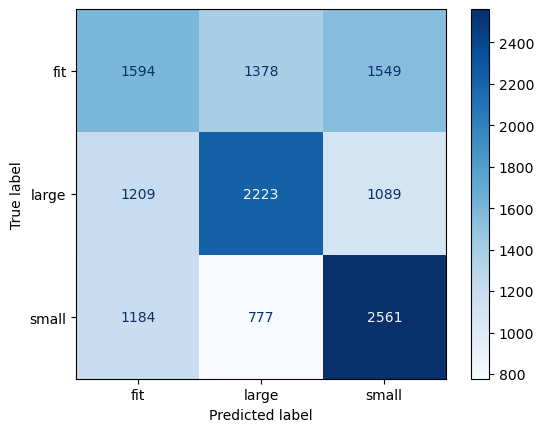

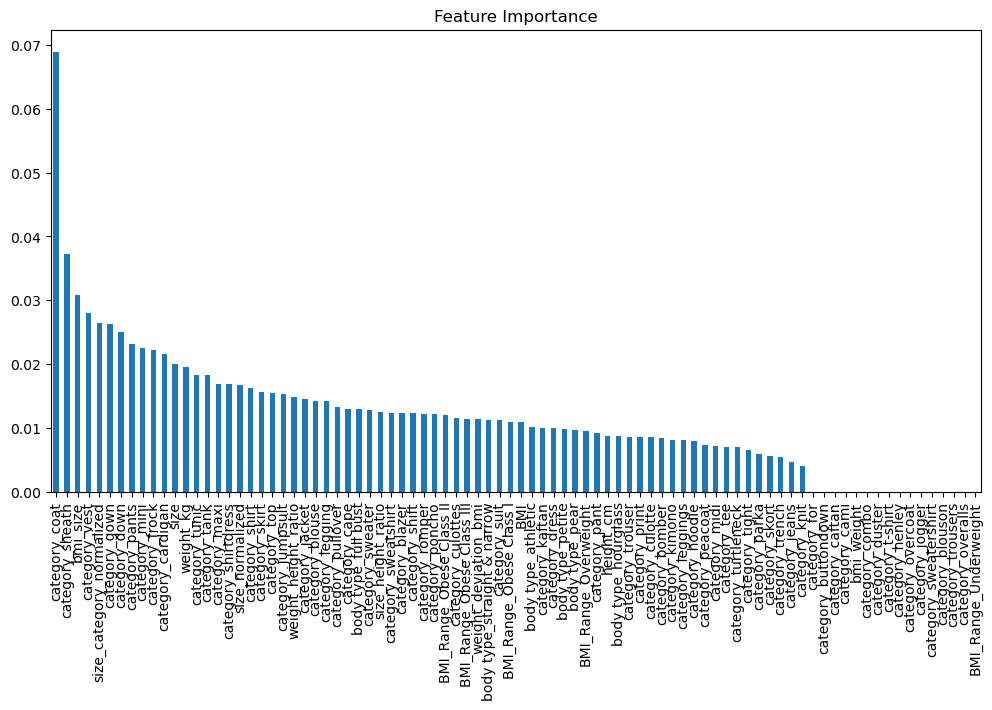

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/yulin.c/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/g7/w17f398n4qlbycls2wz_2cqw0000gn/T/ipykernel_30845/1186404177.py", line 94, in <module>
    rf_grid_search.fit(X_train, y_train)
  File "/Users/yulin.c/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    names out, such as :class:`~sklearn.decomposition.PCA`. For example, if
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/yulin.c/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 898, in fit
    `n_features` is the number of features. For precomputed kernel or
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/yulin.c/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1419, in _run_search
    For multi-metric evaluation, the scores for

In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load and preprocess your dataset (ensure `rent_data_cleaned` is defined)
# Example: rent_data_cleaned = pd.read_csv('your_data.csv')

# Step 1: Feature Engineering
# Handle missing or non-string values in 'review_summary'
rent_data_cleaned['review_summary'] = rent_data_cleaned['review_summary'].fillna('').astype(str)
rent_data_cleaned['size_normalized'] = rent_data_cleaned.groupby('category')['size'].transform(
    lambda x: (x - x.mean()) / x.std()
)
# Impute missing values in 'size_normalized'
rent_data_cleaned['size_normalized'].fillna(rent_data_cleaned['size_normalized'].mean(), inplace=True)
# Aggregated Features
rent_data_cleaned['size_height_ratio'] = rent_data_cleaned['size_normalized'] / rent_data_cleaned['height_cm']
rent_data_cleaned['weight_height_ratio'] = rent_data_cleaned['weight_kg'] / rent_data_cleaned['height_cm']
avg_weight_by_bmi = rent_data_cleaned.groupby('BMI_Range')['weight_kg'].transform('mean')
rent_data_cleaned['weight_deviation_bmi'] = rent_data_cleaned['weight_kg'] - avg_weight_by_bmi

# Interaction Features
rent_data_cleaned['bmi_size'] = rent_data_cleaned['BMI'] * rent_data_cleaned['size_normalized']
rent_data_cleaned['bmi_weight'] = rent_data_cleaned['BMI'] * rent_data_cleaned['weight_kg']

# Normalize size within each category
rent_data_cleaned['size_category_normalized'] = rent_data_cleaned.groupby('category')['size_normalized'].transform(
    lambda x: (x - x.mean()) / x.std()
)

# Categorical Encoding
categorical_columns = ['category', 'body type', 'BMI_Range']
existing_columns = [col for col in categorical_columns if col in rent_data_cleaned.columns]
if existing_columns:
    rent_data_cleaned = pd.get_dummies(rent_data_cleaned, columns=existing_columns, drop_first=True)

# Step 2: Define Features (X) and Target (y)
X = rent_data_cleaned.drop(['fit', 'user_id', 'item_id', 'review_summary', 'rating'], axis=1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(rent_data_cleaned['fit'])  # Encodes 'fit', 'small', 'large' to 0, 1, 2

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Model Implementation
# Gradient Boosting (XGBoost) with Class Weights
class_weights = {0: len(y) / (3 * np.sum(y == 0)), 1: len(y) / (3 * np.sum(y == 1)), 2: len(y) / (3 * np.sum(y == 2))}
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    scale_pos_weight=class_weights  # Handle class imbalance
)
xgb_model.fit(X_train, y_train)

# Step 4: Predict and Evaluate
y_pred = xgb_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, display_labels=label_encoder.classes_, cmap='Blues')
plt.show()

# Feature Importance
feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
feature_importances.plot(kind='bar')
plt.title("Feature Importance")
plt.show()

# Step 5: Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42), param_grid, cv=3, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

print("Best Parameters for Random Forest:", rf_grid_search.best_params_)

# Train the best RF model
best_rf_model = rf_grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Predict and Evaluate RF Model
y_pred_rf = best_rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))


In [86]:
pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 2.2 MB/s eta 0:00:00 MB/s eta 0:00:01m:02
Note: you may need to restart the kernel to use updated packages.


### SVM

In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 2: Handle Missing Values
rent_data_cleaned['body type'] = rent_data_cleaned['body type'].fillna('Unknown')
rent_data_cleaned['height_cm'] = rent_data_cleaned['height_cm'].fillna(rent_data_cleaned['height_cm'].mean())
rent_data_cleaned['weight_kg'] = rent_data_cleaned['weight_kg'].fillna(rent_data_cleaned['weight_kg'].mean())

# Step 3: Feature Engineering
# Add interaction features
rent_data_cleaned['size_height_ratio'] = rent_data_cleaned['size'] / rent_data_cleaned['height_cm']
rent_data_cleaned['weight_height_ratio'] = rent_data_cleaned['weight_kg'] / rent_data_cleaned['height_cm']

# One-hot encode categorical columns
rent_data_cleaned = pd.get_dummies(rent_data_cleaned, columns=['category', 'body type', 'BMI_Range'], drop_first=True)

# Step 4: Define Features (X) and Target (y)
X = rent_data_cleaned.drop(['fit', 'user_id', 'item_id', 'review_summary'], axis=1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(rent_data_cleaned['fit'])  # Encodes 'fit', 'small', 'large' to 0, 1, 2

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train Multi-Class SVM Model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', decision_function_shape='ovr', random_state=42)
svm_model.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = svm_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, display_labels=label_encoder.classes_, cmap='Blues')
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/yulin.c/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/g7/w17f398n4qlbycls2wz_2cqw0000gn/T/ipykernel_30845/4263192482.py", line 37, in <module>
    svm_model.fit(X_train, y_train)
  File "/Users/yulin.c/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    names out, such as :class:`~sklearn.decomposition.PCA`. For example, if
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/yulin.c/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/yulin.c/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 621, in _validate_data
  File "/Users/yulin.c/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1147, in check_X_y
    f" Got {ind

In [40]:
pip install optuna

  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/e8/30/35111dae435c640694d616a611b7ff6b2482cfd977f8f572ff960a321d66/optuna-4.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/cb/06/8b505aea3d77021b18dcbd8133aa1418f1a1e37e432a465b14c46b2c0eaa/alembic-1.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for colorlog from https://files.pythonhosted.org/packages/e3/51/9b208e85196941db2f0654ad0357ca6388ab3ed67efdbfc799f35d1f83aa/colorlog-6.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for Mako from https://files.pythonhosted.org/packages/48/22/bc14c6f02e6dccaafb3eba95764c8f096714260c2aa5f76f654fd16a23dd/Mako-1.3.6-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 6.5 MB/s eta 0:00:006.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━